In [49]:
from glob import glob
import os

import earthpy as et
import pandas as pd
import geopandas as gpd
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import rioxarray as rxr


In [2]:
# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

data_folder_path = os.path.join("data")

if os.path.exists(data_folder_path):
    os.chdir(data_folder_path)
    print("data directory exists")
else:
    print("data directory does not existing, making data directory")
    os.makedir(data_folder_path)
    os.chdir(data_folder_path)

data directory exists


In [6]:
# Download UMN Earthstat Crop maps
et.data.get_data(url ="https://s3.us-east-2.amazonaws.com/earthstatdata/HarvestedAreaYield175Crops_Indvidual_Geotiff/soybean_HarvAreaYield_Geotiff.zip")

Extracted output to /Users/emilycassidy/earth-analytics/data/earthpy-downloads/soybean_HarvAreaYield_Geotiff


'/Users/emilycassidy/earth-analytics/data/earthpy-downloads/soybean_HarvAreaYield_Geotiff'

In [38]:
# Open UMN Crop maps

crop_map_path = os.path.join(
    "earthpy-downloads", "soybean_HarvAreaYield_Geotiff", 
    "soybean_HarvAreaYield_Geotiff", "soybean_HarvestedAreaHectares.tif")

crop_map_data = rxr.open_rasterio(crop_map_path, masked=True)
crop_map_data

<xarray.DataArray (band: 1, y: 2160, x: 4320)>
[9331200 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -180.0 -179.9 -179.8 -179.7 ... 179.8 179.9 180.0
  * y            (y) float64 89.96 89.87 89.79 89.71 ... -89.79 -89.88 -89.96
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

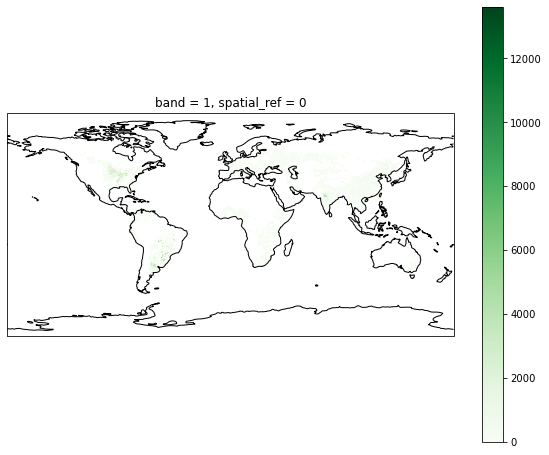

In [67]:

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
cmap = plt.get_cmap('Greens') 
crop_map_masked.plot(ax=ax, cmap=cmap, transform=ccrs.PlateCarree())

In [48]:
projection = crop_map_data.rio.crs
projection

CRS.from_epsg(4326)

In [69]:
crop_map_masked = crop_map_data.where(crop_map_data > 0)
crop_map_masked

<xarray.DataArray (band: 1, y: 2160, x: 4320)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -180.0 -179.9 -179.8 -179.7 ... 179.8 179.9 180.0
  * y            (y) float64 89.96 89.87 89.79 89.71 ... -89.79 -89.88 -89.96
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

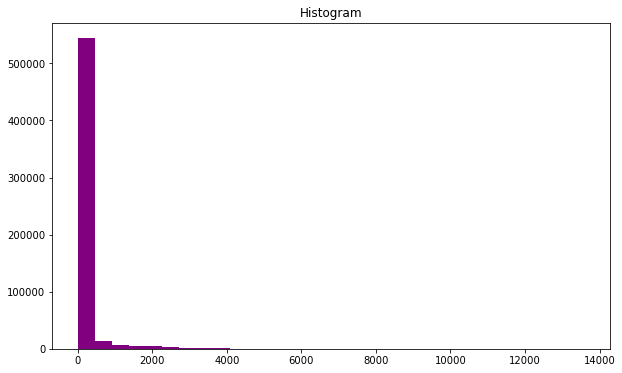

In [70]:
f, ax = plt.subplots(figsize=(10, 6))
crop_map_masked.plot.hist(ax=ax,
                       color="purple",
                       bins=30)
plt.show()

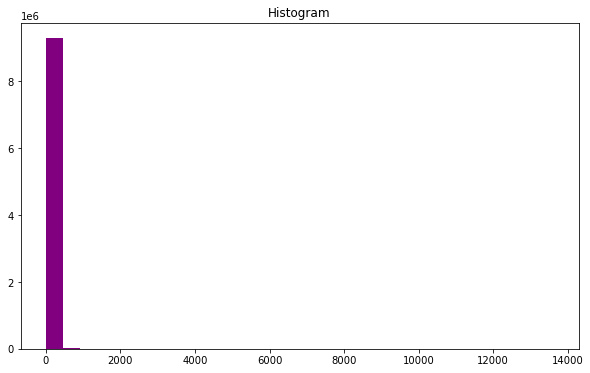

In [63]:
f, ax = plt.subplots(figsize=(10, 6))
crop_map_data.plot.hist(ax=ax,
                       color="purple",
                       bins=30)
plt.show()

In [71]:
et.data.get_data(url = "https://s3.amazonaws.com/mapspam/2000/v3.0.7/geotiff/spam2000v3.0.7_global_harvested-area.geotiff.zip")

Extracted output to /Users/emilycassidy/earth-analytics/data/earthpy-downloads/spam2000v3.0.7_global_harvested-area.geotiff


'/Users/emilycassidy/earth-analytics/data/earthpy-downloads/spam2000v3.0.7_global_harvested-area.geotiff'

In [72]:
# Open IFPRI data

ifpri_crop_map_path = os.path.join(
    "earthpy-downloads", "spam2000v3.0.7_global_harvested-area.geotiff", 
    "spam2000v3r7_harvested-area_SOYB.tif")

ifpri_crop_map_data = rxr.open_rasterio(ifpri_crop_map_path, masked=True)
ifpri_crop_map_data

<xarray.DataArray (band: 1, y: 2160, x: 4320)>
[9331200 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -180.0 -179.9 -179.8 -179.7 ... 179.8 179.9 180.0
  * y            (y) float64 89.96 89.88 89.79 89.71 ... -89.79 -89.87 -89.96
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

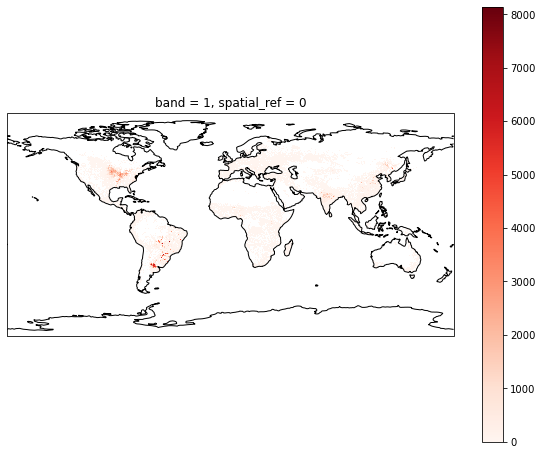

In [74]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
cmap = plt.get_cmap('Reds') 
ifpri_crop_map_data.plot(ax=ax, cmap=cmap, transform=ccrs.PlateCarree())

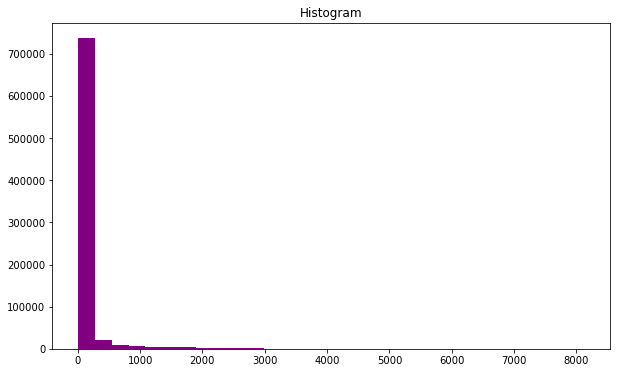

In [76]:
f, ax = plt.subplots(figsize=(10, 6))
ifpri_crop_map_data.plot.hist(ax=ax,
                       color="purple",
                       bins=30)
plt.show()

In [3]:
# Download GADM data
et.data.get_data(url ="https://geodata.ucdavis.edu/gadm/gadm4.0/gadm404-shp.zip")

ConnectionError: HTTPSConnectionPool(host='geodata.ucdavis.edu', port=443): Max retries exceeded with url: /gadm/gadm4.0/gadm404-shp.zip (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fb21e4187f0>: Failed to establish a new connection: [Errno 60] Operation timed out'))